# Introduction

This lab demonstrates the effect of scaling the regularization parameter when using Support Vector Machines (SVMs) for classification. In SVM classification, we are interested in a risk minimization for the equation:

$$
C \sum_{i=1}^{n} \mathcal{L}\big(f(x_i), y_i\big) + \Omega(w)
$$


where:

- **C** is used to set the amount of regularization
- **L** is a loss function of our samples and our model parameters.
- **Ω** is a penalty function of our model parameters

# Import Libraries and Generate Synthetic Dataset

We begin by importing necessary libraries and generating a synthetic dataset appropriate for L1 and L2 regularization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from sklearn.model_selection import validation_curve, ShuffleSplit

n_samples, n_features = 100, 300
X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=5, random_state=42)

rng = np.random.RandomState(42)
y = np.sign(0.5 - rng.rand(n_samples))
X = rng.randn(n_samples, n_features //5) + y[:, np.newaxis]
X += 5 * rng.randn(n_samples, n_features // 5)

# L1-Penalty Case

In the L1 case, theory says that model consistency, in terms of finding the right set of non-zero parameters as well as their signs, can be achieved by scaling **C**. We demonstrate this effect by using a synthetic dataset which is sparse, meaning that only a few features will be informative and useful for the model.

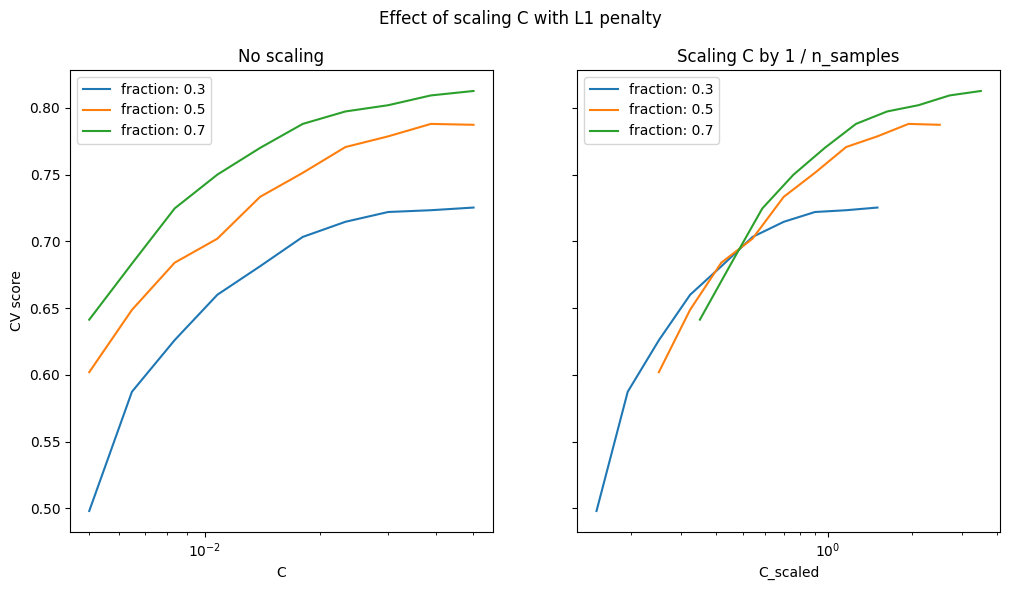

In [2]:
model_l1 = LinearSVC(penalty="l1", loss="squared_hinge", dual=False, tol=1e-3)

Cs = np.logspace(-2.3, -1.3, 10)
train_sizes = np.linspace(0.3, 0.7, 3)
labels = [f"fraction: {train_size}" for train_size in train_sizes]

results = {"C": Cs}
for label, train_size in zip(labels, train_sizes):
    cv = ShuffleSplit(train_size=train_size, test_size=0.3, n_splits=50, random_state=1)
    train_scores, test_scores = validation_curve(
        model_l1, X, y, param_name="C", param_range=Cs, cv=cv
    )
    results[label] = test_scores.mean(axis=1)
results = pd.DataFrame(results)

fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 6))

# plot results without scaling C
results.plot(x="C", ax=axes[0], logx=True)
axes[0].set_ylabel("CV score")
axes[0].set_title("No scaling")

# plot results by scaling C
for train_size_idx, label in enumerate(labels):
    results_scaled = results[[label]].assign(
        C_scaled=Cs * float(n_samples * train_sizes[train_size_idx])
    )
    results_scaled.plot(x="C_scaled", ax=axes[1], logx=True, label=label)
axes[1].set_title("Scaling C by 1 / n_samples")

_ = fig.suptitle("Effect of scaling C with L1 penalty")

# L2-Penalty Case

We can repeat a similar experiment with the **l2** penalty. In this case, the theory says that in order to achieve prediction consistency, the penalty parameter should be kept constant as the number of samples grows.

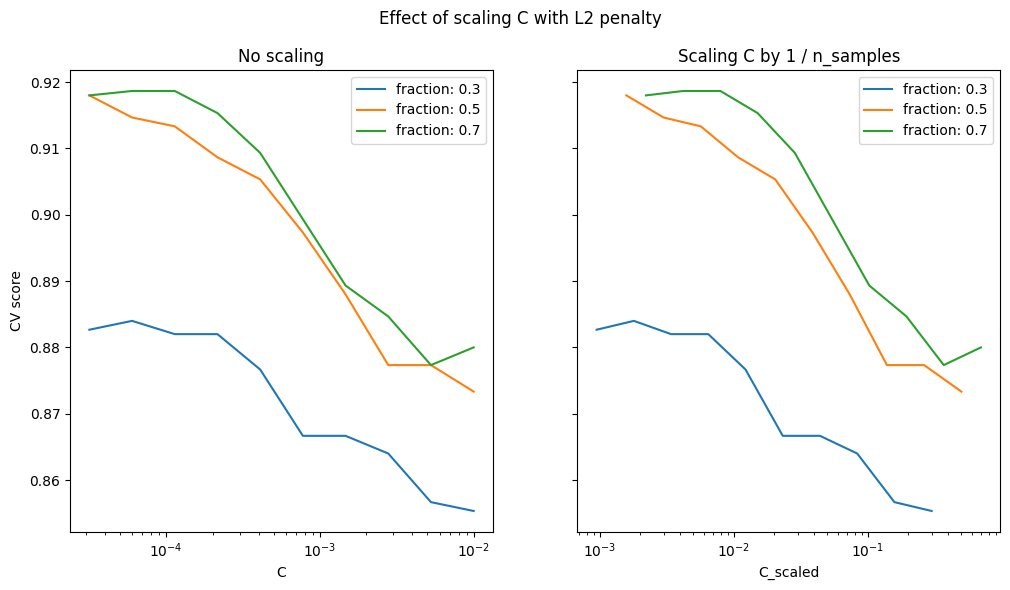

In [3]:
model_l2 = LinearSVC(penalty="l2", loss="squared_hinge", dual=True)
Cs = np.logspace(-4.5, -2, 10)

labels = [f"fraction: {train_size}" for train_size in train_sizes]
results = {"C": Cs}
for label, train_size in zip(labels, train_sizes):
    cv = ShuffleSplit(train_size=train_size, test_size=0.3, n_splits=50, random_state=1)
    train_scores, test_scores = validation_curve(
        model_l2, X, y, param_name="C", param_range=Cs, cv=cv
    )
    results[label] = test_scores.mean(axis=1)
results = pd.DataFrame(results)

fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 6))

# plot results without scaling C
results.plot(x="C", ax=axes[0], logx=True)
axes[0].set_ylabel("CV score")
axes[0].set_title("No scaling")

# plot results by scaling C
for train_size_idx, label in enumerate(labels):
    results_scaled = results[[label]].assign(
        C_scaled=Cs * float(n_samples * train_sizes[train_size_idx])
    )
    results_scaled.plot(x="C_scaled", ax=axes[1], logx=True, label=label)
axes[1].set_title("Scaling C by 1 / n_samples")

_ = fig.suptitle("Effect of scaling C with L2 penalty")

# Summary

This lab demonstrated the effect of scaling the regularization parameter in SVMs for both L1 and L2 penalty. For L1 penalty, we observed that the cross-validation-error correlates best with the test-error when scaling **C** with the number of samples. For L2 penalty, the best result comes from the case where **C** is not scaled.